<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [1]:
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium





Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://security.ubuntu.c

In [5]:
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [6]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options)
link = 'https://www.imdb.com/title/tt7286456/reviews?ref_=tt_urv'
title_array = []
review_array = []
driver.get(link)
for num in range(4):
  driver.find_element(By.CLASS_NAME,"ipl-load-more__button").click()
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      title_array.append((ele.text).replace('\n',''))
      review_array.append(sub_ele.text)
df = pd.DataFrame(list(zip(title_array, review_array)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

Length of data frame is 124


,Title,Review
0,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o..."
1,"A psychological study, rather than a superhero...",I have seen Joker yesterday at Venice an early...
2,Went for a second time to watch,I get why some people hate this . It's because...
3,JUST AMAZING. How does this movie exist.,Let me start off by saying if Joaquin Phoneix ...
4,Outstanding movie with a haunting performance ...,"Every once in a while a movie comes, that trul..."
...,...,...
119,Masterpiece *Movie Of the Year* Best Actor - J...,"Wow I honestly gotta tell you, it's one of the..."
120,The Joker is supposed to be a diabolical maste...,
121,Better if didn't saw,Disturbing. Just got out of the movie. My humo...
122,Why Todd Phillipps Made This Film,You will notice the far left journalists: the ...


In [9]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [10]:
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [11]:
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [12]:
import re
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))


In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
from textblob import TextBlob
df['Spelling Correction'] = df['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))

In [16]:
import nltk
nltk.download('punkt')
df['Tokenization'] = df['Spelling Correction'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
from nltk.stem import PorterStemmer
s = PorterStemmer()
df['After Stemming'] = df['Tokenization'].apply(lambda x: " ".join([s.stem(w) for w in x]))

In [18]:
from textblob import Word
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

df['After Lemmatization'] = df['After Stemming'].apply(lambda x: " ".join([Word(w).lemmatize() for w in x.split()]))
df.to_csv('/content/sample_data/reviwes.csv',index=False)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [22]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

w_sen = []
for s in df['After Lemmatization']:
  w_sen.append(word_tokenize(s))
a = [x1 for x1 in w_sen if x1 != []]
iterations = list(itertools.chain.from_iterable(a))

In [24]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('taxi', 'driver', 'king'): 6, ('driver', 'king', 'comedi'): 6, ('director', 'told', 'phillip'): 5, ('dark', 'knight', 'trilog'): 4, ('robert', 'de', 'no'): 4, ('perform', 'joaquin', 'phoenix'): 4, ('upon', 'time', 'hollywood'): 3, ('new', 'york', 'citi'): 3, ('joaquin', 'phoenix', 'play'): 3, ('one', 'best', 'move'): 3, ...})

In [25]:
from collections import Counter
b_grams = nltk.bigrams(iterations)
f_dist = nltk.FreqDist(b_grams)
b_grams_dict = dict(f_dist)
for w in b_grams_dict:
  print( str(w) + ':' + str(b_grams_dict[w] / iterations.count(w[0])))

Streaming output truncated to the last 5000 lines.
('dark', 'emot'):0.02857142857142857
('emot', 'thought'):0.09090909090909091
('thought', 'provok'):0.07692307692307693
('provok', 'action'):1.0
('action', 'action'):0.14285714285714285
('action', 'one'):0.07142857142857142
('best', 'move'):0.09375
('move', 'give'):0.05
('seen', 'long'):0.043478260869565216
('time', 'critic'):0.017543859649122806
('critic', 'definit'):0.1111111111111111
('definit', 'lost'):0.1
('lost', 'touch'):0.3333333333333333
('touch', 'public'):0.25
('public', 'ignor'):0.5
('ignor', 'one'):0.14285714285714285
('one', 'favor'):0.017241379310344827
('favor', 'watch'):1.0
('watch', 'rememb'):0.023809523809523808
('rememb', 'good'):0.3333333333333333
('one', 'anoth'):0.017241379310344827
('anoth', 'dont'):0.14285714285714285
('dont', 'know'):0.07142857142857142
('know', 'someon'):0.11764705882352941
('someon', 'el'):0.14285714285714285
('el', 'go'):0.5
('go', 'titl'):0.09090909090909091
('titl', 'worst'):0.2
('worst', 

In [26]:
w_data = ''
i1 = []
i = 1
for l in df['After Lemmatization']:
  w_data = w_data + l
  value = 'Review-' + str(i)
  i1.append(value)
  i += 1

In [27]:
import nltk
nltk.download('brown')
from textblob import TextBlob
noun_phrases = []
freq = []
for l in df['After Lemmatization']:
  blob = TextBlob(l)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for w in noun_phrases:
  noun_p_freq = []
  for line in df['After Lemmatization']:
    noun_p_freq.append(line.count(w) / w_data.count(w))
  freq.append(noun_p_freq)
noun_phrases_df = pd.DataFrame(freq).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = i1
noun_phrases_df  

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


,truli masterpiec,hollywood film,film decad truli,comic book willingli realist,direct cinematographi music act peopl surpris,violent necess messag societi reflect underappreciatedunrecognizedbulli peopl,someth way show class differ,corrupt rich talent rule,differ believ,multipl joke,...,bid mayb award medal weight,pathet role brood,mental disturb arthur fleck ak joke oscar nomin,time hollywood nomin,scar year compet joke,nomin shock joke,shock disappoint,time hollywood,joke compet categori,true oscar night joke
Review-1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Review-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0
Review-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Review-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Review-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review-120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Review-121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Review-122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Review-123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [28]:
# Write your code here

import math
def tf_idf_value(sentence,word):
  size = len(sentence.split(" "))
  tf_value = sentence.count(word)/size
  idf_value = 0
  if(tf_value!=0):
    idf_value = math.log(size)/sentence.count(word)
  else:
    return 0;
  return tf_value*idf_value

sentences = df["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list,columns=["token"])
count = 0
for i in sentences:
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
  count+=1

tf_idf





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


,token,0,1,2,3,4,5,6,7,8,...,114,115,116,117,118,119,120,121,122,123
0,,0.055855,0.035297,0.110774,0.058163,0.081918,0.093937,0.0,0.070931,0.062052,...,0.015598,0.070931,0.077095,0.140502,0.023813,0.032879,0.0,0.149787,0.030795,0.041835
1,electrifying,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,used,0.000000,0.035297,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,that,0.055855,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.015598,0.000000,0.000000,0.000000,0.023813,0.000000,0.0,0.000000,0.000000,0.000000
4,nonsense,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,human,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.023813,0.000000,0.0,0.000000,0.000000,0.000000
2765,public,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2766,trouble,0.000000,0.035297,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2767,based,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.032879,0.0,0.000000,0.000000,0.000000


In [29]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [30]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
qry_sen = 'Shang-Chi and the Legend of the Ten Rings is an Action - Fantasy movie in which we watch a new era of Marvel Studios rise with Shang-Chi,the master of Kung Fu. He has to face his past involving him with the Ten Rings organization and crate his future accordingly.Finally, I have to say that "Shang-Chi and the Legend of the Ten Rings" is an amazing movie and I strongly recommend everyone to watch it, especially the fans of Marvel.'
X_list = word_tokenize(qry_sen)
sw = stopwords.words('english') 
X_set = {w1 for w1 in X_list if not w1 in sw}

In [33]:
query_sentence = 'Shang-Chi and the Legend of the Ten Rings is an Action - Fantasy movie in which we watch a new era of Marvel Studios rise with Shang-Chi,the master of Kung Fu. He has to face his past involving him with the Ten Rings organization and crate his future accordingly.Finally, I have to say that "Shang-Chi and the Legend of the Ten Rings" is an amazing movie and I strongly recommend everyone to watch it, especially the fans of Marvel.'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english') 
X_set = {w for w in X_list if not w in sw}

In [34]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector: 
      if w in X_set: l1.append(1)
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvector, l1, l2

In [35]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return cosine


In [36]:
similarity_list = []
for sentence in df['Spelling Correction']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,"Truly a masterpiece, The Best Hollywood film o...",0.0
1,I have seen Joker yesterday at Venice an early...,0.030268
2,I get why some people hate this . It's because...,0.063277
3,Let me start off by saying if Joaquin Phoneix ...,0.041757
4,"Every once in a while a movie comes, that trul...",0.048479
...,...,...
119,"Wow I honestly gotta tell you, it's one of the...",0.030528
120,,None
121,Disturbing. Just got out of the movie. My humo...,0.037716
122,You will notice the far left journalists: the ...,0.027888


In [37]:
def compute_vec(X_set, Y_set):
  rvec = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w1 in rvec: 
      if w1 in X_set: l1.append(1)
      else: l1.append(0) 
      if w1 in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvec, l1, l2

In [38]:
def compute_cos(rvec, l1, l2):
  c1= 0
  for i1 in range(len(rvec)): 
        c1+= l1[i1]*l2[i1] 
  cos = c1 / float((sum(l1)*sum(l2))**0.5) 
  return cos


In [39]:
similar_lst = []
for sen in df['Spelling Correction']:
  Y_list = word_tokenize(sen)
  Y_set = {w1 for w1 in Y_list if not w1 in sw}
  rvector, l1, l2 = compute_vec(X_set, Y_set)
  try:
    similar = compute_cos(rvector, l1, l2)
  except ZeroDivisionError:
    similar = 'None'
  similar_lst.append(similar)
cos_dataframe = pd.DataFrame(list(zip(df['Review'],similar_lst)), columns=['Reviews','Cosine Similarity'])
cos_dataframe

,Reviews,Cosine Similarity
0,"Truly a masterpiece, The Best Hollywood film o...",0.0
1,I have seen Joker yesterday at Venice an early...,0.030268
2,I get why some people hate this . It's because...,0.063277
3,Let me start off by saying if Joaquin Phoneix ...,0.041757
4,"Every once in a while a movie comes, that trul...",0.048479
...,...,...
119,"Wow I honestly gotta tell you, it's one of the...",0.030528
120,,None
121,Disturbing. Just got out of the movie. My humo...,0.037716
122,You will notice the far left journalists: the ...,0.027888


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [40]:
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium






Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency 

In [41]:
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [42]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options)
link = 'https://www.imdb.com/title/tt7286456/reviews?ref_=tt_urv'
title_array = []
review_array = []
driver.get(link)
for num in range(4):
  driver.find_element(By.CLASS_NAME,"ipl-load-more__button").click()
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      title_array.append((ele.text).replace('\n',''))
      review_array.append(sub_ele.text)
df = pd.DataFrame(list(zip(title_array, review_array)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

Length of data frame is 125


,Title,Review
0,I would not call it a masterpiece as some did,
1,Not a spoon feeding of CGI fueled faux drama.,The movie affects you in a way that makes it p...
2,Is it great? I don't know.,When I heard everyone saying that this is the ...
3,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o..."
4,"A psychological study, rather than a superhero...",I have seen Joker yesterday at Venice an early...
...,...,...
120,Oscar winner,
121,There Are No Capes Here,Joaquin Phoenix transforms into the titular ch...
122,"If you're an outcast, you'll understand this m...",And I'm not saying you need to be a freak. Man...
123,A Cynical Movie For Cynical Times,Who is the crazier one? The one who is able to...


In [43]:
list2 = []
for i in df.index:
    y = str(df["Review"][i]).split()
    list2.append(y)


In [44]:
from gensim.models import Word2Vec
model2 = Word2Vec(list2, size = 300)
print(model2)

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Word2Vec(vocab=478, size=300, alpha=0.025)


In [45]:
words2 = list(model2.wv.vocab)
words2

['The',
 'movie',
 'you',
 'in',
 'a',
 'way',
 'that',
 'makes',
 'it',
 'to',
 'but',
 'good',
 'When',
 'I',
 'everyone',
 'saying',
 'this',
 'is',
 'the',
 'film',
 'of',
 'and',
 'all',
 'reviews',
 'with',
 'was',
 'quite',
 'for',
 'movie.',
 'out',
 'felt',
 'me',
 'say',
 'this,',
 'This',
 'real',
 'masterpiece.',
 'cinematography',
 'acting',
 "that's",
 'just',
 'it.',
 'are',
 'plot',
 'on',
 'so',
 'actually',
 "it's",
 'there',
 'no',
 'points',
 'Phoenix',
 'score',
 'great.',
 'also',
 'incredible',
 'not',
 'great',
 'at',
 'all.',
 'It',
 'even',
 'has',
 'scenes',
 'left',
 'Best',
 'one',
 'films',
 'And',
 'truly',
 'comic',
 'book',
 'Some',
 'people',
 'find',
 "It's",
 'about',
 'society',
 'those',
 'they',
 'can',
 'do',
 'something',
 'shows',
 'class',
 'how',
 'rich',
 'others',
 'around',
 'them',
 'what',
 'There',
 'could',
 'be',
 'multiple',
 'our',
 'much',
 'than',
 'making',
 'up',
 'first',
 'film.',
 'A',
 'have',
 'seen',
 'Joker',
 'an',
 'We'

In [46]:
# fit a 2d PCA model to the vectors
from sklearn.decomposition import PCA

X = model2[model2.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


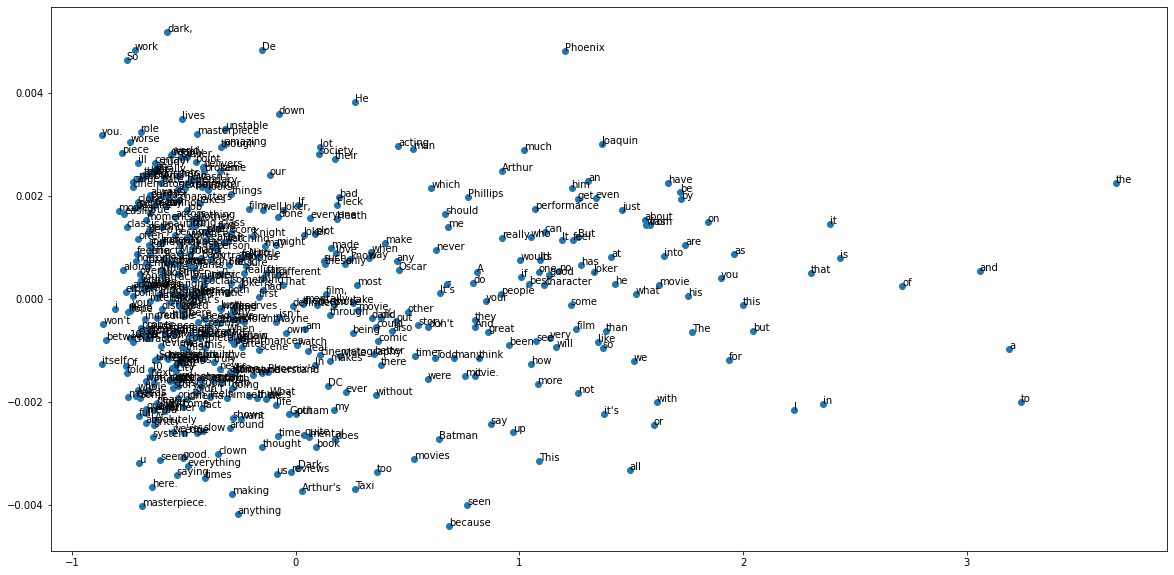

In [47]:
# create a scatter plot of the projection
import matplotlib.pyplot as plt
plt.figure (figsize = (20,10))
plt.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: https://github.com/krishnamrajupenumatsa/Info_5731/blob/main/sentiment-analysis.csv



